# Método de Runge Kutta (Cuarto Orden)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def runge_kutta4(a, b, h, f, y0):
    #h = (b - a)/N
    N = int((b - a)/h)
    
    x = np.linspace(a, b, N + 1)
    
    y = np.zeros(N + 1)
    
    y[0] = y0
    
    #print(x[0], y[0])
    
    for i in range(N):
        k1 = h*f(y[i], x[i])
        k2 = h*f(y[i] + k1/2, x[i] + h/2)
        k3 = h*f(y[i] + k2/2, x[i] + h/2)
        k4 = h*f(y[i] + k3, x[i + 1])
        
        y[i + 1] = y[i] + 1/6*(k1 + 2*k2 + 2*k3 + k4)
        
        #print(x[i + 1], y[i + 1])
        
    return y

In [7]:
def f(y, x):
    f0 = 1e-9
    c = 1e-18
    
    H = 1e-2
    
    f = 2*f0*np.exp(-c*(1 + H**2))*(np.sinh(2*c*H) - y*np.cosh(2*c*H))
    
    return f
a = 0.0
b = 500.0
h = 0.05
y0 = 1.0

N = int((b - a)/h)

x = np.linspace(a, b, N + 1)
y = runge_kutta4(a, b, h, f, y0)

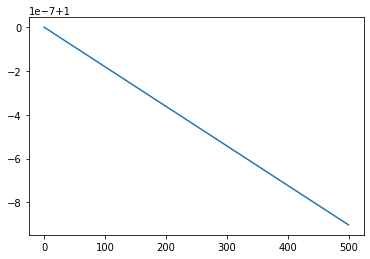

In [8]:
plt.plot(x, y)
#plt.plot(xsol, ysol)
#plt.legend(['euler', 'exacto'])
plt.show()

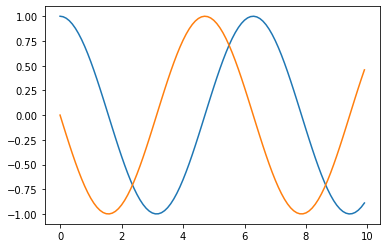

In [9]:
a = 0
b = 10.0
N =100
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
upoints = []


def F(x, u):
    k = 1.0
    m = 1.0
    return -(k/m)*x

x = 1.0
u = 0
for t in tpoints:
    xpoints.append(x)
    upoints.append(u)

    l1 = h*u
    k1 = h*F(x, u)  

    l2 = h*(u + 0.5*k1)
    k2 = h*F(x + 0.5*l1, u + 0.5*k1)

    l3 = h*(u + 0.5*k2)
    k3 = h*F(x + 0.5*l2, u + 0.5*k2)

    l4 = h*(u + k3)
    k4 = h*F(x + l3, u + k3)

    x += (l1 + 2*l2 + 2*l3 + l4)/6
    u += (k1 + 2*k2 + 2*k3 + k4)/6

plt.plot(tpoints, xpoints)
plt.plot(tpoints, upoints)